In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [57]:
import pandas as pd
raw_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/NYPD_Complaint_Data_Historic.csv",low_memory=False) 

In [39]:
THRESHOLD = 0
UNUSED_LABELS = ['STATION_NAME', 'TRANSIT_DISTRICT', 'PARKS_NM'] # note: these labels are completely or mostly empty
UNKNOWN_VALUES = ['UNKNOWN', 'U']
LABELS_TO_BE_USED = [
                     'CMPLNT_NUM',
                     'BORO_NM',
                     'OFNS_DESC',
                     'CMPLNT_FR_DT',
                     'CMPLNT_FR_TM',
                     'CMPLNT_TO_DT',
                     'CMPLNT_TO_TM',
                     'HOUSING_PSA',
                     'LAW_CAT_CD',
                     'SUSP_AGE_GROUP',
                     'SUSP_RACE',
                     'SUSP_SEX',
                     'VIC_AGE_GROUP',
                     'VIC_RACE',
                     'VIC_SEX',
                     'Latitude',
                     'Longitude'
]

In [40]:
def get_threshold(threshold):
  return len(raw_data.columns)-len(UNUSED_LABELS)-threshold

def test_get_threshold():
  pass

In [41]:
data = raw_data \
  .drop(columns=UNUSED_LABELS) \
  .replace({ val:None for val in UNKNOWN_VALUES }) \
  .dropna(thresh=get_threshold(0)) \
  .loc[:, LABELS_TO_BE_USED]

In [42]:
data

,CMPLNT_NUM,BORO_NM,OFNS_DESC,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,HOUSING_PSA,LAW_CAT_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
33,593134992,BROOKLYN,FELONY ASSAULT,07/20/2013,18:30:00,07/20/2013,18:32:00,227,FELONY,25-44,BLACK,M,25-44,BLACK,F,40.654339,-73.895576
108,566503769,BROOKLYN,GRAND LARCENY,08/04/2012,23:50:00,08/04/2012,23:55:00,47522,FELONY,25-44,BLACK,F,45-64,BLACK,F,40.659775,-73.917856
168,563768013,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,06/15/2017,03:30:00,06/15/2017,06:15:00,243,MISDEMEANOR,25-44,BLACK,M,25-44,BLACK,M,40.635707,-73.922573
178,677977125,BRONX,ASSAULT 3 & RELATED OFFENSES,12/01/2016,03:01:00,12/01/2016,04:07:00,879,MISDEMEANOR,25-44,WHITE HISPANIC,M,45-64,WHITE HISPANIC,F,40.834955,-73.878673
247,380439115,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,02/21/2016,20:25:00,02/21/2016,20:30:00,450,MISDEMEANOR,25-44,BLACK,F,45-64,BLACK,F,40.679018,-73.924182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982942,368358311,BROOKLYN,HARRASSMENT 2,12/05/2017,11:00:00,12/05/2017,11:15:00,411,VIOLATION,45-64,BLACK,F,25-44,BLACK,F,40.665686,-73.898619
6983012,622273511,MANHATTAN,HARRASSMENT 2,03/11/2018,20:30:00,03/11/2018,21:00:00,696,VIOLATION,45-64,WHITE HISPANIC,M,25-44,BLACK HISPANIC,F,40.796444,-73.964918
6983079,808144426,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,01/27/2018,03:39:00,01/27/2018,03:54:00,590,MISDEMEANOR,25-44,WHITE HISPANIC,F,25-44,BLACK HISPANIC,M,40.723393,-73.976255
6983092,255356017,BROOKLYN,ROBBERY,11/29/2018,22:35:00,11/29/2018,22:40:00,434,FELONY,25-44,BLACK,M,18-24,WHITE,F,40.686748,-73.946042


In [34]:
###Data Visualization 1
data.value_counts(["SUSP_RACE", "SUSP_SEX"])

SUSP_RACE                       SUSP_SEX
BLACK                           M           33858
                                F           12100
WHITE HISPANIC                  M           11104
                                F            4567
BLACK HISPANIC                  M            4112
                                F            1400
WHITE                           M             979
                                F             504
ASIAN / PACIFIC ISLANDER        M             317
                                F             104
AMERICAN INDIAN/ALASKAN NATIVE  M              41
                                F              14
dtype: int64

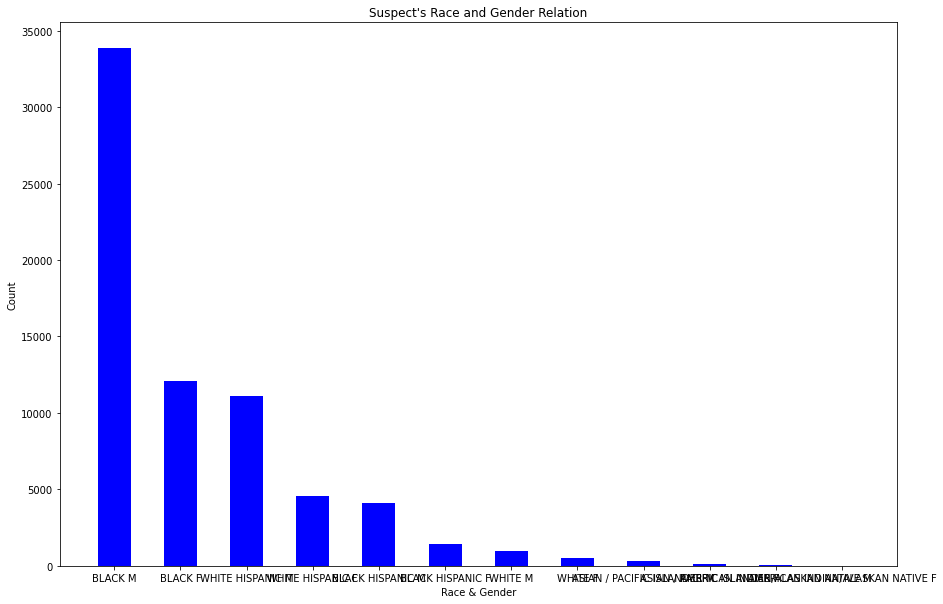

In [35]:
import numpy as np
import matplotlib.pyplot as plt

data = {'BLACK M':33858, 'BLACK F':12100, 'WHITE HISPANIC M':11104, 'WHITE HISPANIC F':4567, 
        'BLACK HISPANIC M':4112, 'BLACK HISPANIC F':1400, 'WHITE M':979, 'WHITE F':504, 
        'ASIAN / PACIFIC ISLANDER M': 317, 'ASIAN / PACIFIC ISLANDER F':104, 'AMERICAN INDIAN/ALASKAN NATIVE M':41, 'AMERICAN INDIAN/ALASKAN NATIVE F':14}
a = list(data.keys())
b = list(data.values())
  
fig = plt.figure(figsize = (15, 10))
 
plt.bar(a, b, color ='blue',
        width = 0.5)
 
plt.xlabel("Race & Gender")
plt.ylabel("Count")
plt.title("Suspect's Race and Gender Relation")
plt.show()

In [46]:
###Data Visualization 2
data["CMPLNT_FR_DT"] = pd.to_datetime(data.CMPLNT_FR_DT)
data = data.drop( data[ data['CMPLNT_FR_DT'] < pd.Timestamp(2010,1,1) ].index)
data['CMPLNT_FR_DT'].dt.year.value_counts()

2016    8641
2019    8621
2018    8380
2017    8379
2015    6896
2014    4605
2013    3738
2012    3272
2011    2990
2010    2979
Name: CMPLNT_FR_DT, dtype: int64

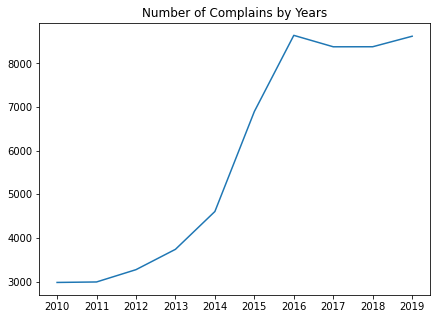

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

figure(figsize=(7, 5))

plt.title('Number of Complains by Years')

ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
plt.xticks(ticks, labels)

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2979, 2990, 3272, 3738, 4605, 6896, 8641, 8379, 8380, 8621]

plt.plot(x, y)
plt.show()

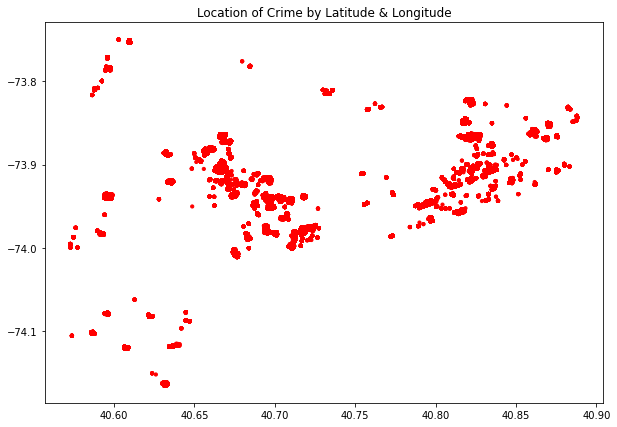

In [68]:
###Data Visualization 3
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

figure(figsize=(10, 7))
plt.title('Location of Crime by Latitude & Longitude')

# k means
kmeans = KMeans(n_clusters=1, random_state=0)
data['cluster'] = kmeans.fit_predict(data[['Latitude', 'Longitude']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
data['cen_x'] = data.cluster.map({0:cen_x[0]})
data['cen_y'] = data.cluster.map({0:cen_y[0]})

# define and map colors
colors = ['#FF0000']
data['c'] = data.cluster.map({0:colors[0]})

plt.scatter(data.Latitude, data.Longitude, c=data.c, alpha = 1, s=10)